In [80]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Models Performance Visualization 

In [81]:
def visualizar_resultados_modelo(nombre_modelo, y_test, y_pred):
    residuals = y_test - y_pred
    sorted_idx = np.argsort(y_test)

    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f"Evaluación del modelo: {nombre_modelo}", fontsize=16)

    # Histograma reales vs predichos
    sns.histplot(y_test, color="blue", label="Real", kde=True, stat="density", ax=axs[0, 0])
    sns.histplot(y_pred, color="orange", label="Predicho", kde=True, stat="density", ax=axs[0, 0])
    axs[0, 0].set_title("Distribución Real vs Predicho")
    axs[0, 0].legend()

    # Dispersión real vs predicción
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, ax=axs[0, 1])
    axs[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axs[0, 1].set_title("Real vs Predicción")
    axs[0, 1].set_xlabel("Real")
    axs[0, 1].set_ylabel("Predicho")

    # Residuos vs predicción
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, ax=axs[0, 2])
    axs[0, 2].axhline(0, linestyle="--", color="red")
    axs[0, 2].set_title("Residuos vs Predicción")

    # Histograma de errores
    sns.histplot(residuals, bins=50, kde=True, ax=axs[1, 0])
    axs[1, 0].axvline(0, color='red', linestyle='--')
    axs[1, 0].set_title("Distribución de Errores")

    # Curva ordenada
    axs[1, 1].plot(y_test.values[sorted_idx], label="Real", color="blue", alpha=0.7)
    axs[1, 1].plot(y_pred[sorted_idx], label="Predicho", color="orange", alpha=0.7)
    axs[1, 1].set_title("Curva ordenada Real vs Predicho")
    axs[1, 1].legend()

    # Métricas numéricas como texto
    texto = (
        f"R² = {r2_score(y_test, y_pred):.4f}\n"
        f"MAE = {mean_absolute_error(y_test, y_pred):.2f}\n"
        f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}\n"
        f"Error medio % = {np.mean(np.abs((y_test - y_pred) / y_test)) * 100:.2f}%"
    )

    axs[1, 2].axis('off')
    axs[1, 2].text(0.01, 0.8, texto, fontsize=12, verticalalignment='top')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [82]:
model_data_linear = joblib.load("../saved_models/linear.pkl")
model_data_ridge = joblib.load("../saved_models/ridge.pkl")
model_data_lasso = joblib.load("../saved_models/lasso.pkl")
model_data_elasticnet = joblib.load("../saved_models/elasticnet.pkl")
model_data_gradient_boosting = joblib.load("../saved_models/gradient_boosting.pkl")
model_data_random_forest = joblib.load("../saved_models/random_forest.pkl")
model_data_gradient_boosting_hybrid = joblib.load("../saved_models/gradient_boosting_hybrid.pkl")

model_linear = model_data_linear["pipeline"]
model_ridge = model_data_ridge["pipeline"]
model_lasso = model_data_lasso["pipeline"]
model_elasticnet = model_data_elasticnet["pipeline"]
model_gradient_boosting = model_data_gradient_boosting["pipeline"]
model_random_forest = model_data_random_forest["pipeline"]
model_gradient_boosting_hybrid = model_data_gradient_boosting_hybrid["pipeline"]
#metadata = model_data["metadata"]

In [83]:
# Separar características (X) y etiqueta (y)
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').squeeze()

In [84]:
y_pred_linear = model_linear.predict(X_test)
y_pred_ridge = model_ridge.predict(X_test)
y_pred_lasso = model_lasso.predict(X_test)
y_pred_elasticnet = model_elasticnet.predict(X_test)
y_pred_gradient_boosting = model_gradient_boosting.predict(X_test)
y_pred_random_forest = model_random_forest.predict(X_test)
y_pred_gradient_boosting_hybrid = model_gradient_boosting_hybrid.predict(X_test)

In [85]:
# Destransformación si se usó log
#if metadata.get("log_transformed", False):
y_pred_linear = np.expm1(y_pred_linear)
y_pred_ridge = np.expm1(y_pred_ridge)
y_pred_lasso = np.expm1(y_pred_lasso)
y_pred_elasticnet = np.expm1(y_pred_elasticnet)
y_pred_gradient_boosting = np.expm1(y_pred_gradient_boosting)
y_pred_random_forest = np.expm1(y_pred_random_forest)
y_pred_gradient_boosting_hybrid = np.expm1(y_pred_gradient_boosting_hybrid)


y_test = np.expm1(y_test)

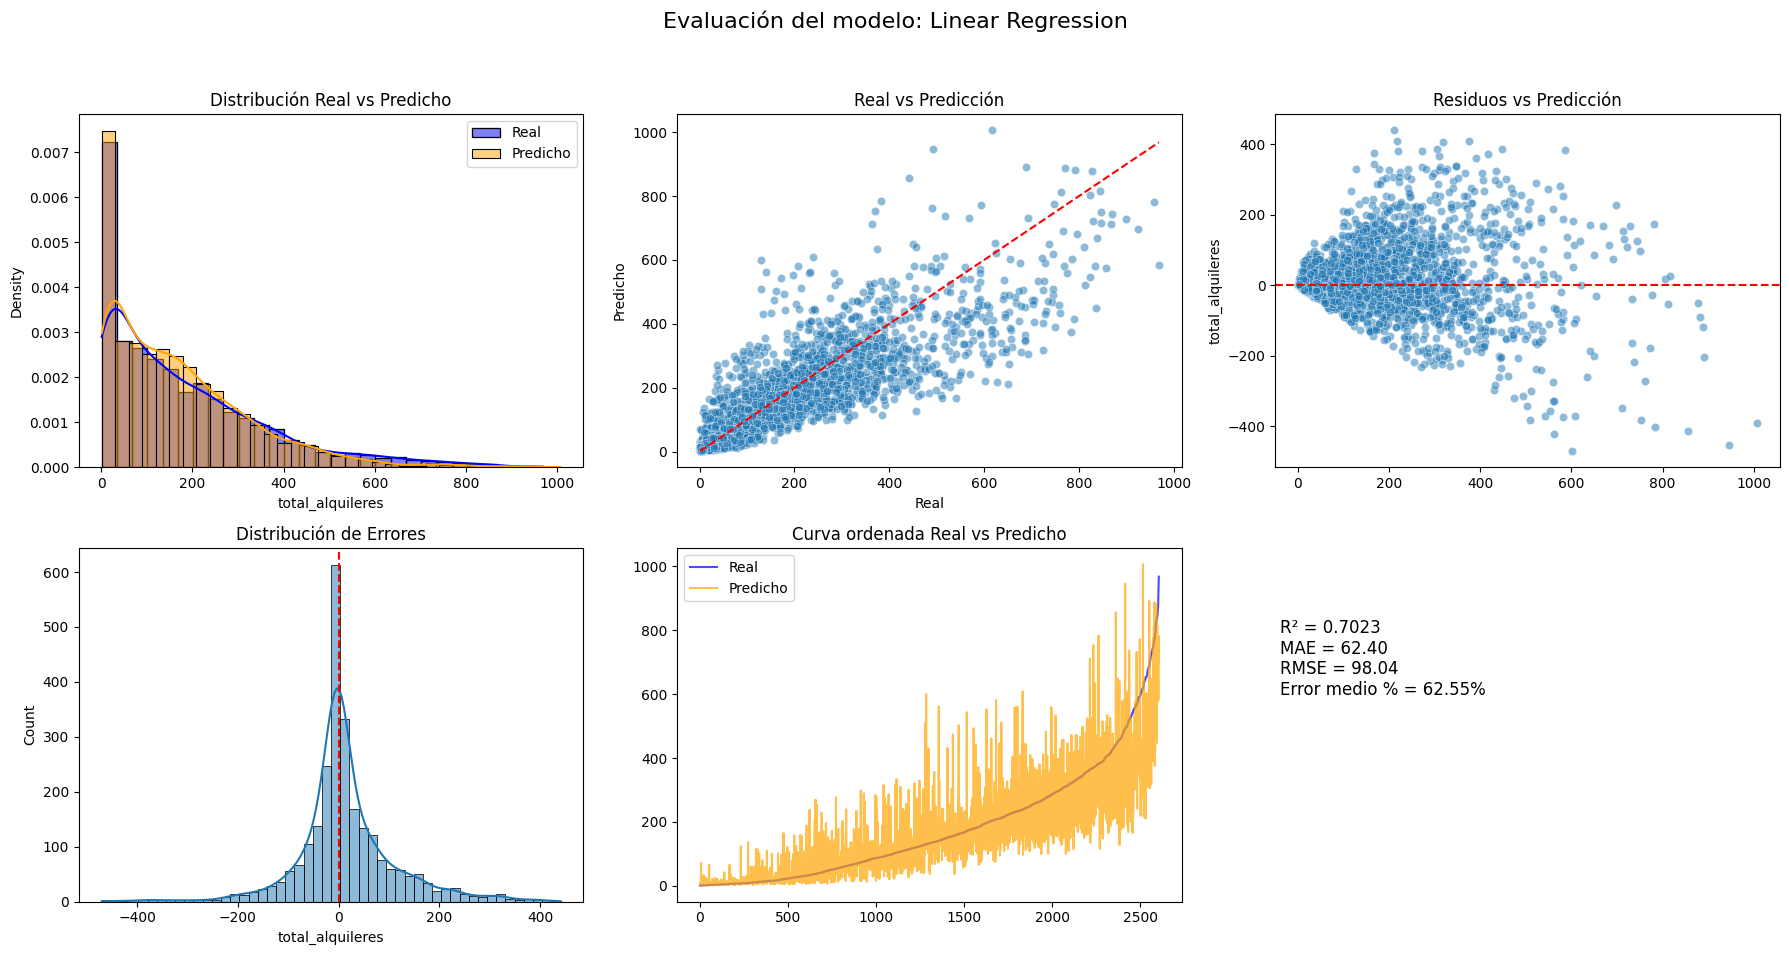

In [86]:
visualizar_resultados_modelo("Linear Regression", y_test, y_pred_linear)

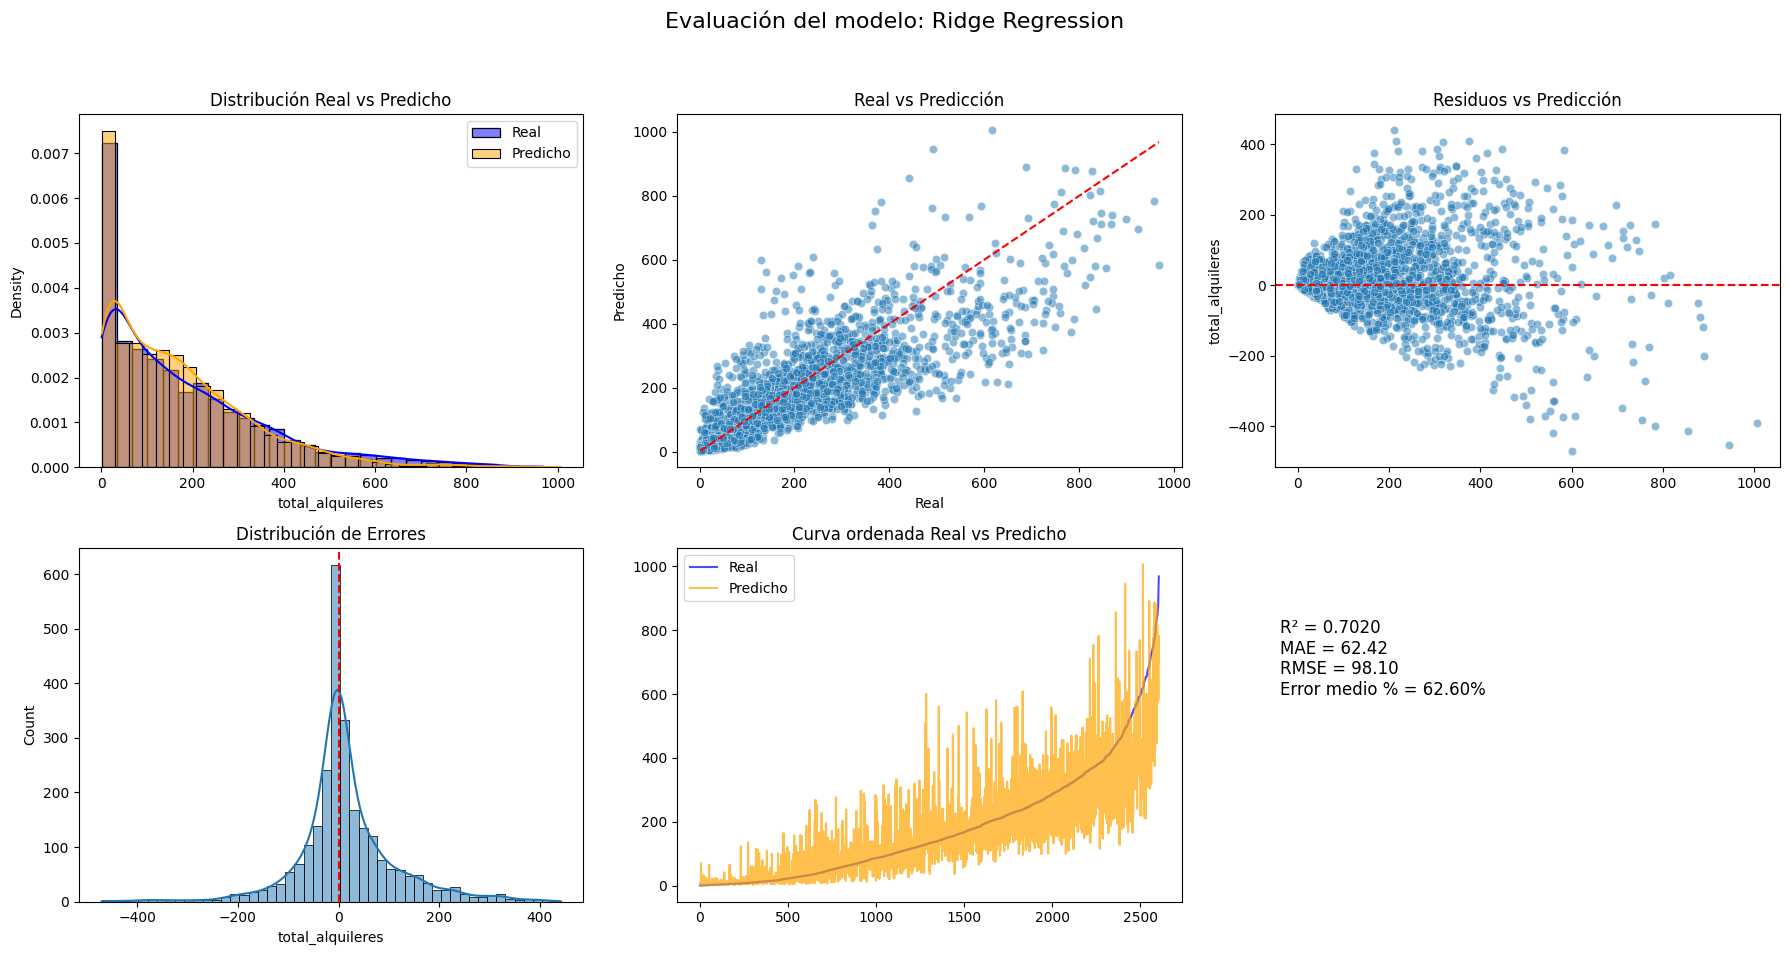

In [87]:
visualizar_resultados_modelo("Ridge Regression", y_test, y_pred_ridge)

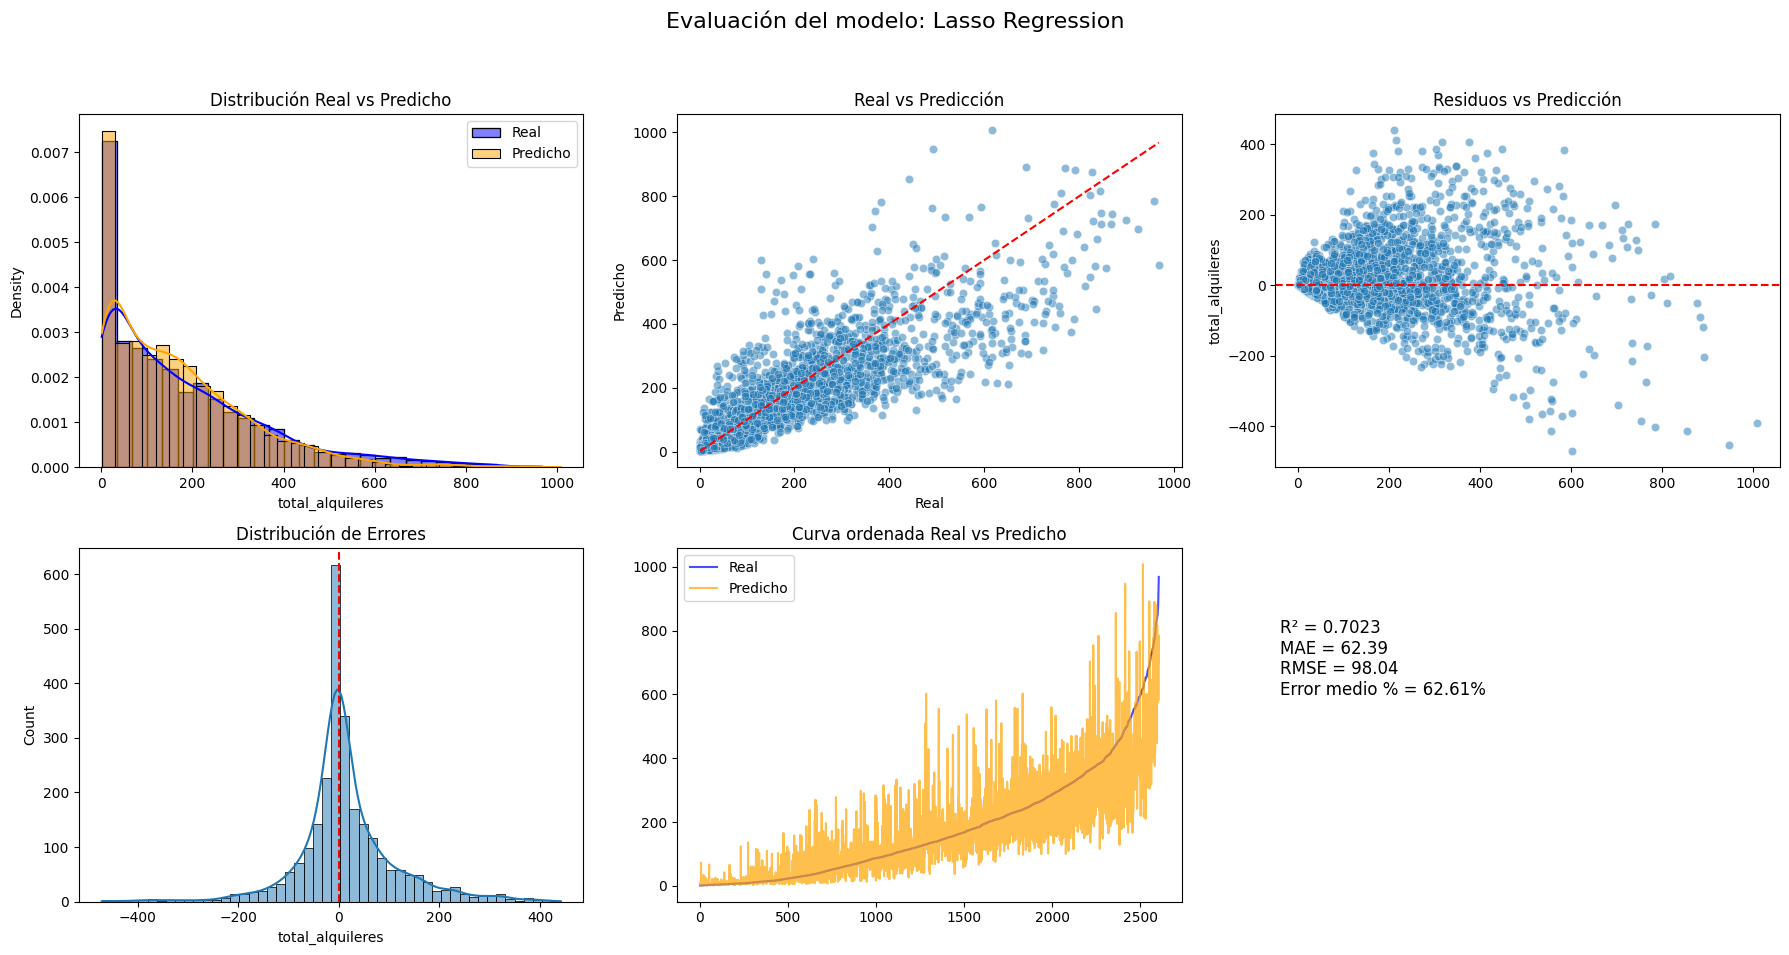

In [88]:
visualizar_resultados_modelo("Lasso Regression", y_test, y_pred_lasso)

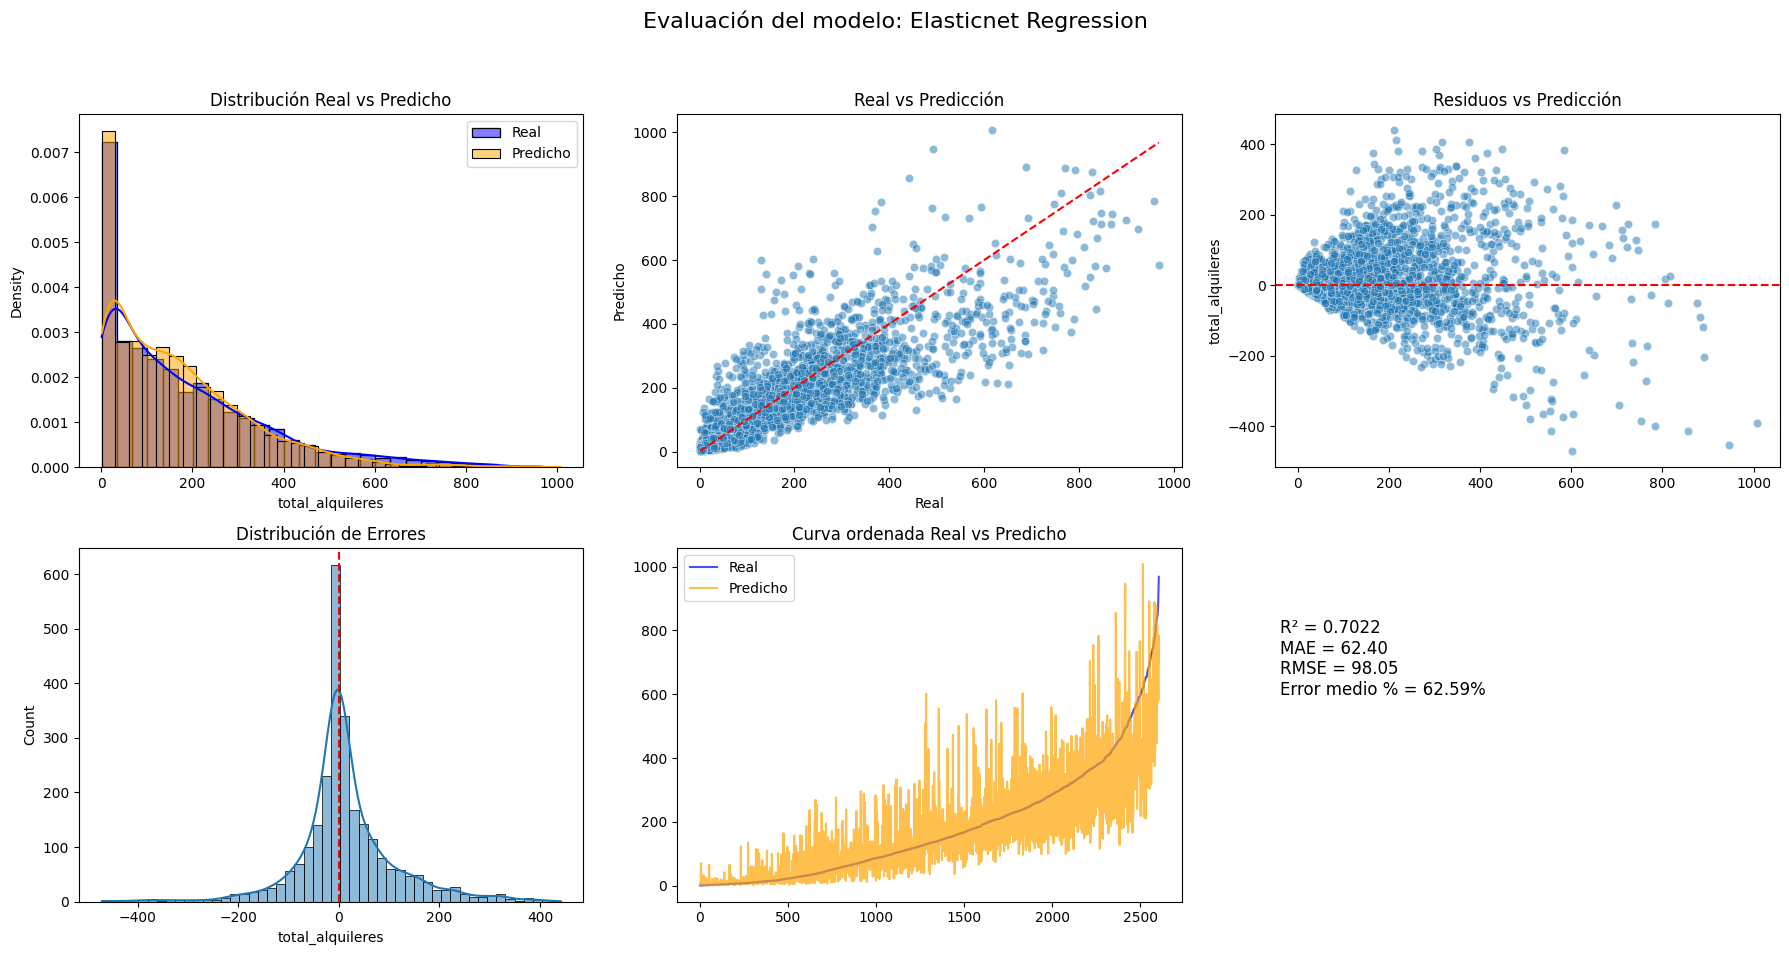

In [89]:
visualizar_resultados_modelo("Elasticnet Regression", y_test, y_pred_elasticnet)

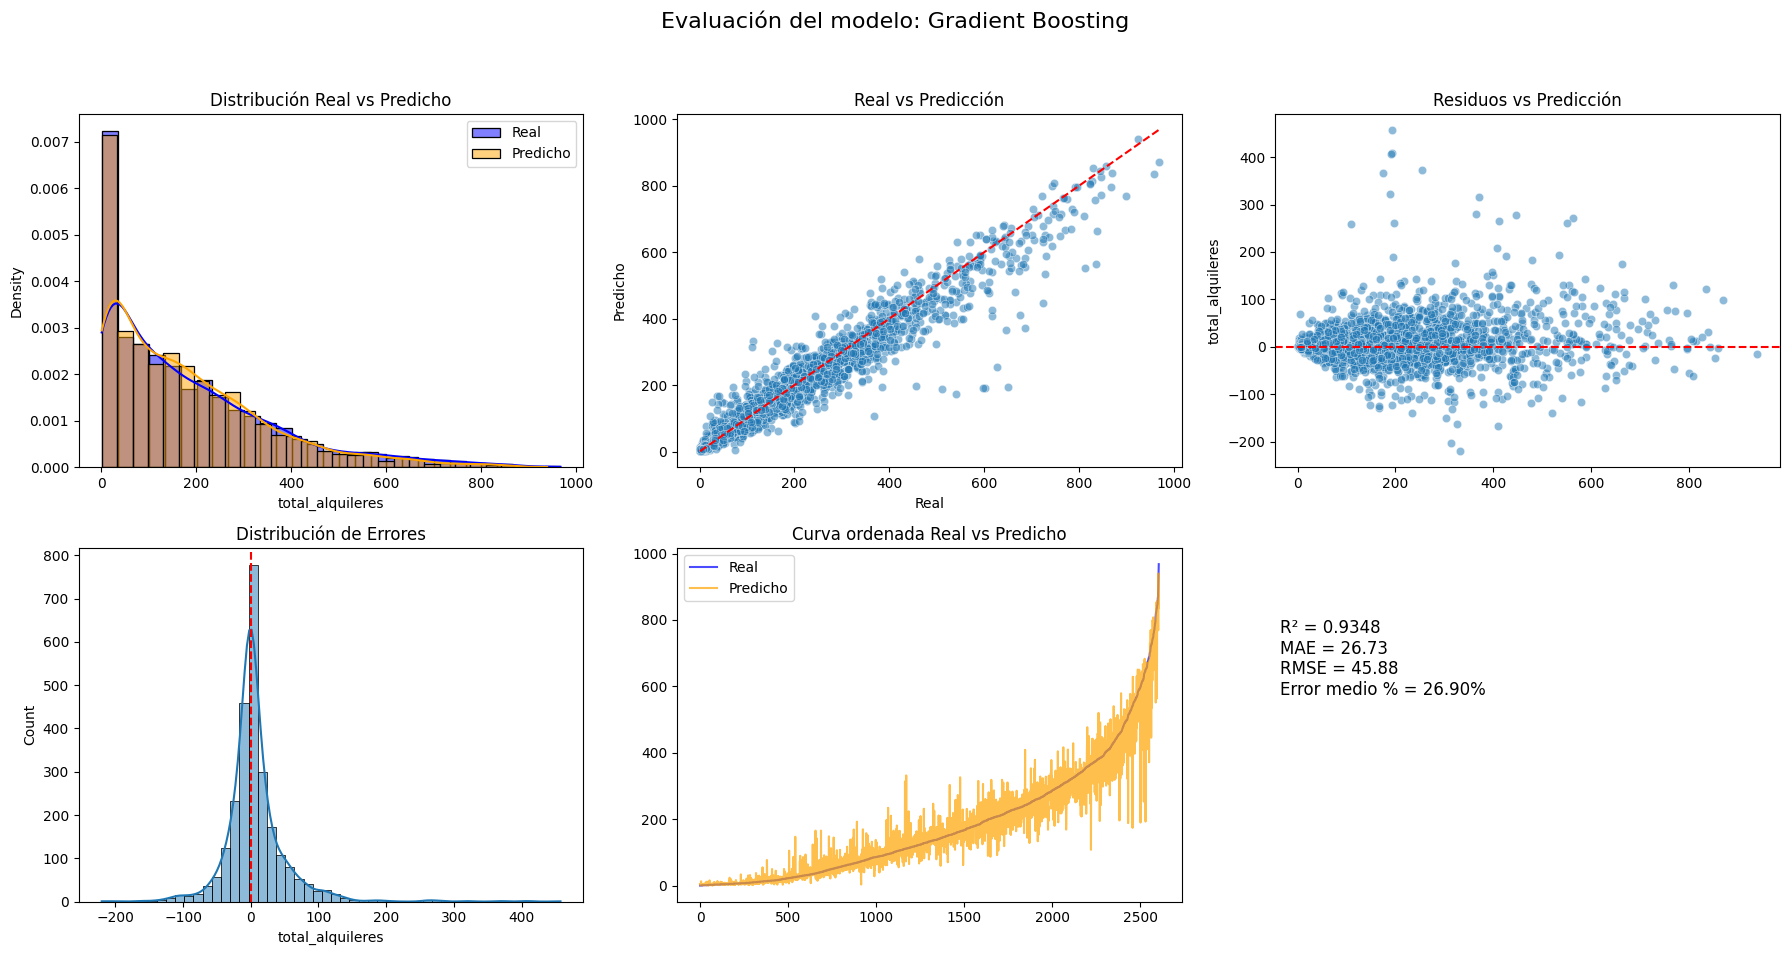

In [90]:
visualizar_resultados_modelo("Gradient Boosting", y_test, y_pred_gradient_boosting)

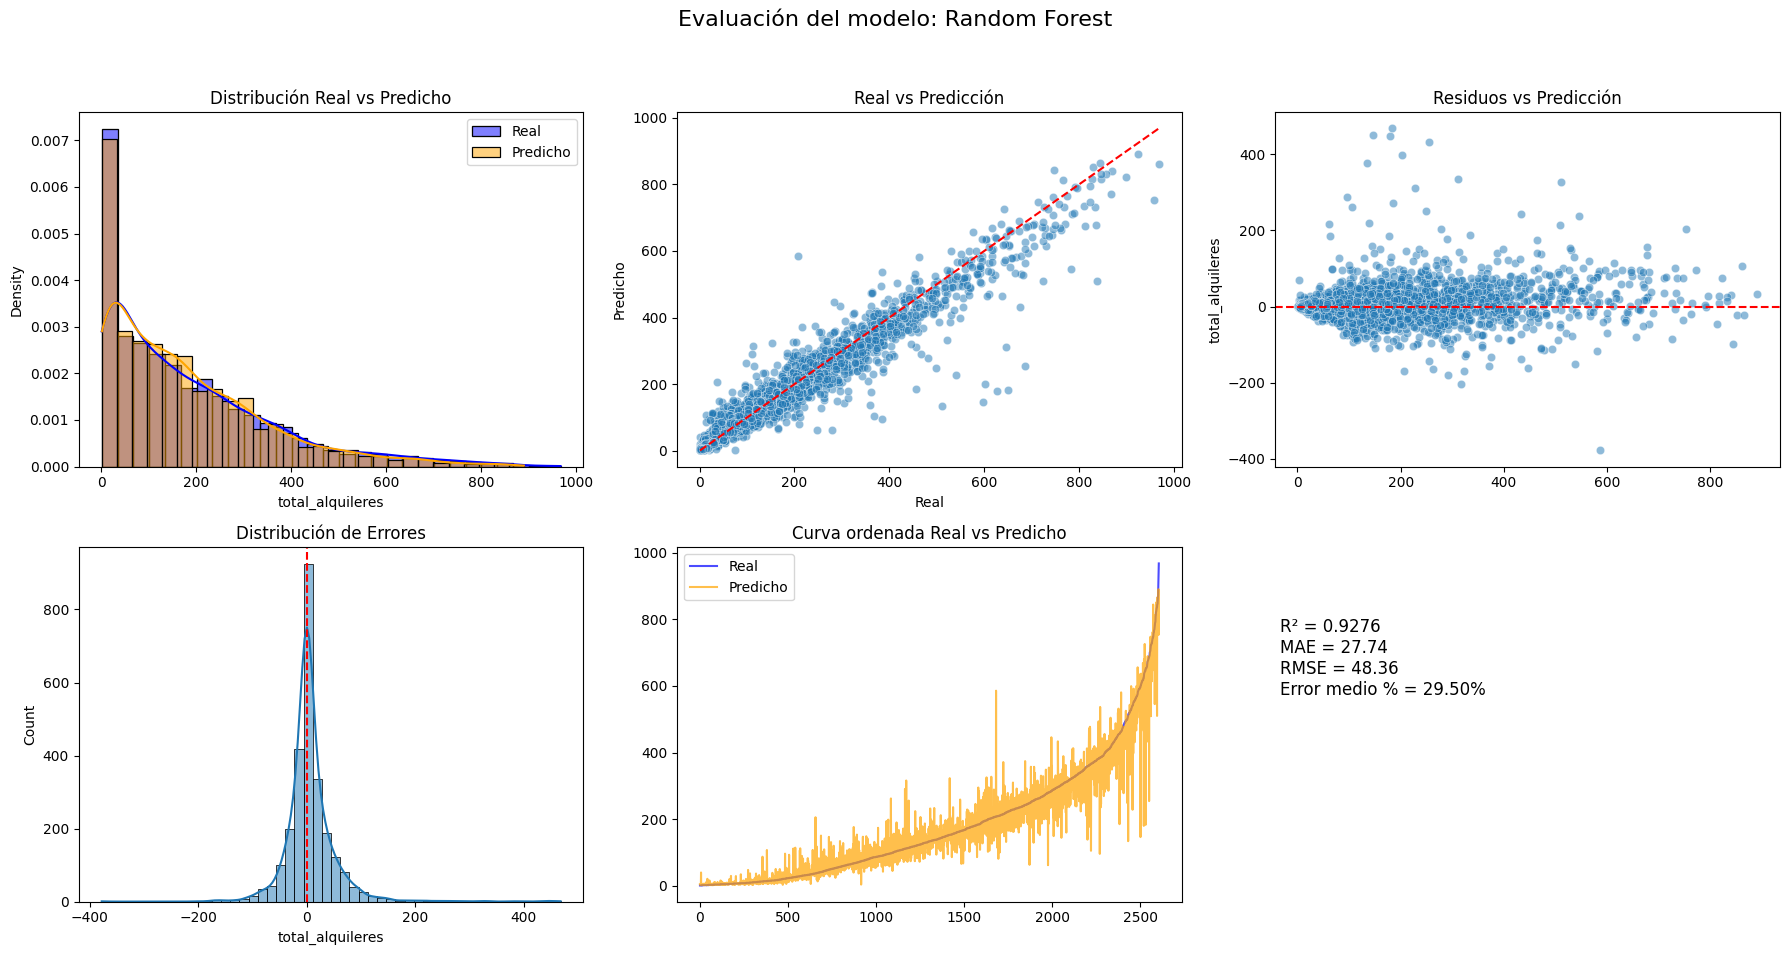

In [91]:
visualizar_resultados_modelo("Random Forest", y_test, y_pred_random_forest)

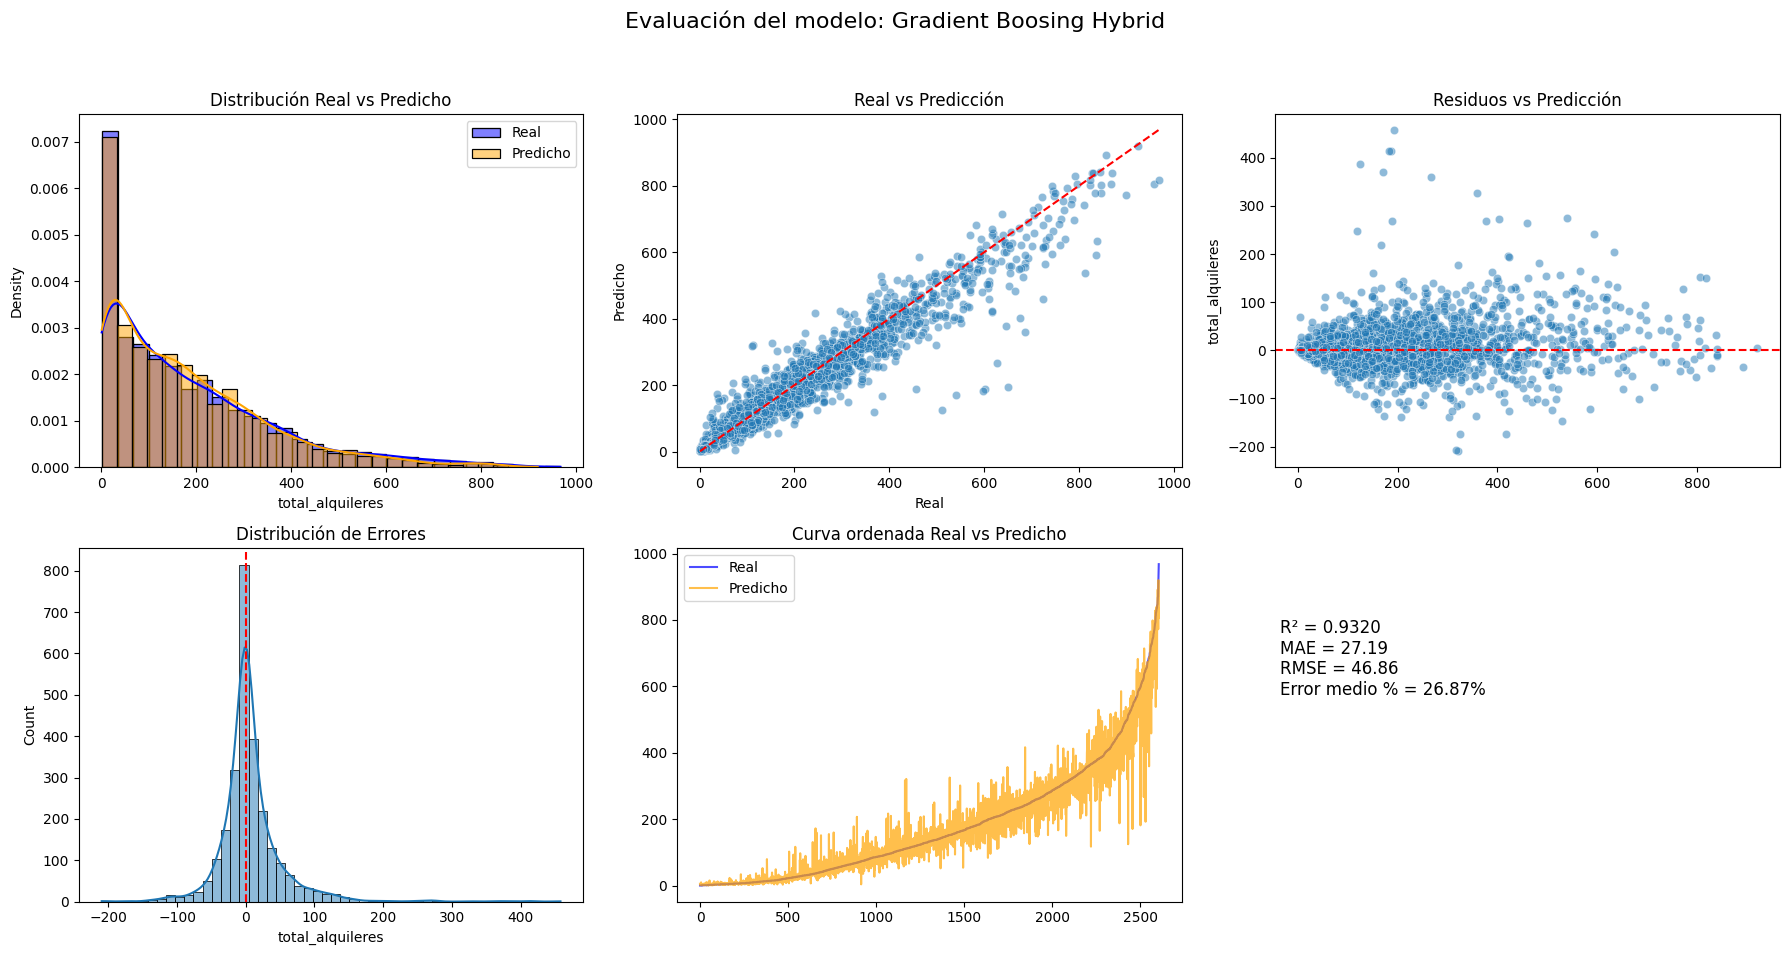

In [92]:
visualizar_resultados_modelo("Gradient Boosing Hybrid", y_test, y_pred_gradient_boosting_hybrid)